# Exploring and preprocessing DTI images

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
import sys

sys.path.append("../scripts/")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from dti import *

## Looking at data distributions

In [7]:
metadf = prep_meta_df(pd.read_csv("../data/meta/dti_preprocessed_control,pd_meta.csv"))
metadf

,iid,pid,group,sex,age,visit,modality,desc,type,acq_date,fmt
0,411215,4083,PD,M,46,1,DTI,EPI Corrected B0 map,Processed,2013-01-15,NiFTI
1,428590,4083,PD,M,47,5,DTI,EigenVal2-EPI,Processed,2014-01-13,NiFTI
2,411122,4083,PD,M,46,1,DTI,EigenVectors-EPI,Processed,2013-01-15,NRRD
3,428592,4083,PD,M,47,5,DTI,EigenVal1-MRI,Processed,2014-01-13,NiFTI
4,411129,4083,PD,M,46,1,DTI,EigenVectors-MRI,Processed,2013-01-15,NRRD
...,...,...,...,...,...,...,...,...,...,...,...
1561,428714,3108,PD,F,50,1,DTI,MD map-MRI,Processed,2011-04-20,NiFTI
1562,291593,3108,PD,F,50,1,DTI,EigenVal0-EPI,Processed,2011-04-20,NiFTI
1563,330469,3108,PD,F,50,1,DTI,EigenVal2-MRI,Processed,2011-04-20,NiFTI
1564,291581,3108,PD,F,50,1,DTI,EPI Corrected B0 map,Processed,2011-04-20,NiFTI


In [8]:
len(metadf)

1566

(array([ 28.,  18.,  36.,   0.,   0.,   0.,   0.,   0.,   0.,  28.,  64.,
        146.,   0.,  64., 110.,  90.,   0.,  64., 136., 118.,   0., 100.,
         72., 218., 274.]),
 array([31.  , 31.76, 32.52, 33.28, 34.04, 34.8 , 35.56, 36.32, 37.08,
        37.84, 38.6 , 39.36, 40.12, 40.88, 41.64, 42.4 , 43.16, 43.92,
        44.68, 45.44, 46.2 , 46.96, 47.72, 48.48, 49.24, 50.  ]),
 <a list of 25 Patch objects>)

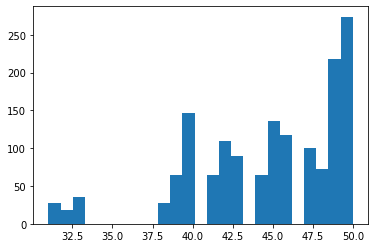

In [9]:
plt.hist(metadf["age"], bins=25)

In [10]:
metadf["group"].value_counts()

PD         972
Control    594
Name: group, dtype: int64

In [11]:
metadf["sex"].value_counts()

M    1230
F     336
Name: sex, dtype: int64

In [12]:
print("Number of unique subjects:", metadf["pid"].nunique())
print("Number of unique controls:", metadf[metadf["group"] == "Control"]["pid"].nunique())
print("Number of unique PD:", metadf[metadf["group"] == "PD"]["pid"].nunique())

Number of unique subjects: 39
Number of unique controls: 14
Number of unique PD: 25


In [13]:
metadf["desc"].value_counts()

EigenVal1-EPI           95
MD map-EPI              95
EigenVal2-EPI           95
EigenVal0-EPI           95
EigenVectors-EPI        95
FA map-EPI              95
RGB color map-EPI       95
4D DWI                  95
DTI Full Tensors-EPI    95
EPI Corrected B0 map    95
FA map-MRI              77
MD map-MRI              77
EigenVal0-MRI           77
EigenVal2-MRI           77
RGB color map-MRI       77
DTI Full Tensors-MRI    77
EigenVectors-MRI        77
EigenVal1-MRI           77
Name: desc, dtype: int64

## Looking at the metadata for the original DTI images

In [78]:
allmetadf = prep_meta_df(pd.read_csv("../data/meta/dti_all_original_meta_preprocess.csv"))
allmetadf

Not dropping non-existent column `dl`


,iid,pid,group,sex,age,visit,modality,desc,type,acq_date,fmt
0,226465,PPMI3557,PD,M,59,1,DTI,TRIGGERED DTI,Original,2010-12-22,DCM
1,495186,PPMI41519,GenCohort PD,F,71,1,DTI,TRA/DUAL,Original,2015-03-13,DCM
2,495188,PPMI41519,GenCohort PD,F,71,1,DTI,TRA/DUAL,Original,2015-03-13,DCM
3,880677,PPMI42264,GenCohort PD,F,65,1,DTI,T2,Original,2016-12-02,DCM
4,507861,PPMI41522,GenCohort PD,F,58,1,DTI,T2,Original,2015-06-10,DCM
...,...,...,...,...,...,...,...,...,...,...,...
2600,467146,PPMI08819NOV14,Phantom,F,65,0,DTI,DTI,Original,2014-11-19,DCM
2601,436131,PPMI01202JUL14,Phantom,X,54,0,DTI,DTI,Original,2014-07-02,DCM
2602,367537,PPMI12001APR13,Phantom,F,53,0,DTI,DTI,Original,2013-04-01,DCM
2603,414254,PPMI29005NOV13,Phantom,X,53,0,DTI,DTI,Original,2013-11-05,DCM


## Getting unique patients and images

In [79]:
control_pids = set(allmetadf[allmetadf["group"] == "Control"]["pid"])

In [80]:
pd_pids = set(allmetadf[allmetadf["group"] == "PD"]["pid"])

In [81]:
control_iids = set(allmetadf[allmetadf["group"] == "Control"]["iid"])

In [82]:
pd_iids = set(allmetadf[allmetadf["group"] == "PD"]["iid"])

## Split into train, val, and test splits for CONTROLS using PID

In [88]:
train_frac = 0.7
val_frac = 0.15
test_frac = 0.15

def split_dataset(ids, train_frac, val_frac, test_frac):
    ids = set(ids)
    N = len(ids)
    
    train_num = int(train_frac * N)
    val_num = int(val_frac * N)
    
    train_ids = set(random.sample(ids, k=train_num))
    ids -= train_ids
    val_ids = set(random.sample(ids, k=val_num))
    ids -= val_ids
    test_ids = ids
    
    return train_ids, val_ids, test_ids
    
ppmi_control_train, ppmi_control_val, ppmi_control_test = split_dataset(
    control_pids,
    train_frac,
    val_frac,
    test_frac)

In [89]:
len(allmetadf[allmetadf["pid"].isin(control_train)])

224

## Setting up train/test/valid split for IXI data

In [90]:
IXI_DATA_PATH = "/home/eager/modeling-parkinsons/data/processed/ixi_dti_reshaped_control/"
ALL_IXI_IMG_PATHS = glob.glob(f"{IXI_DATA_PATH}/*.nii")

In [91]:
all_ixi_pids = set()

for imgpath in ALL_IXI_IMG_PATHS:
    info = get_iminf_from_fpath(imgpath)
    all_ixi_pids.add(info.pid)

In [92]:
len(all_ixi_pids)

400

In [93]:
ixi_train, ixi_val, ixi_test = split_dataset(all_ixi_pids, train_frac, val_frac, test_frac)

In [94]:
len(ixi_train)

280

In [95]:
len(ixi_val)

60

In [96]:
len(ixi_test)

60

## Save CONTROLS PIDs to files

In [100]:
all_control_train = ppmi_control_train | ixi_train
all_control_test = ppmi_control_test | ixi_test
all_control_valid = ppmi_control_val | ixi_val

In [102]:
def pids_to_file(ofname, pids):
    with open(ofname, "w") as f:
        for pid in pids:
            f.write(f"{pid}\n")

In [106]:
#pids_to_file("/home/eager/modeling-parkinsons/control_train_pids.dat", all_control_train)
#pids_to_file("/home/eager/modeling-parkinsons/control_valid_pids.dat", all_control_valid)
#pids_to_file("/home/eager/modeling-parkinsons/control_test_pids.dat", all_control_test)

## Split PD PIDs into Train/Valid/Test

In [110]:
# extract the available PIDs by looking at the image files and seeing
# which patients we have extracting data for

PD_DATA_SRC = "/home/eager/modeling-parkinsons/data/raw/ppmi_dti_pd/"
PD_ALL_IMG_PATHS = glob.glob(f"{PD_DATA_SRC}/*.nii")

In [113]:
all_pd_pids = set()

for imgpath in PD_ALL_IMG_PATHS:
    info = get_iminf_from_fpath(imgpath)
    all_pd_pids.add(info.pid)

In [116]:
pd_train, pd_val, pd_test = split_dataset(all_pd_pids, train_frac, val_frac, test_frac)

In [119]:
len(pd_test)

23

In [123]:
#pids_to_file("/home/eager/modeling-parkinsons/v1/pd_train_pids.dat", pd_train)
#pids_to_file("/home/eager/modeling-parkinsons/v1/pd_valid_pids.dat", pd_val)
#pids_to_file("/home/eager/modeling-parkinsons/v1/pd_test_pids.dat", pd_test)